# PLA - Perceptron Learning Algorithm

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def CriaDataSet(n=20, slop=[2,1], intercept=-0.4): 
    #exemplo 1
    #slop=[2,1], intercept=-0.4

    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X,slop)-[0, intercept]
    y = (AUX[:,0] > X[:,1])*2-1
    
    return X, y

def CriaDataSetRegressao(n=20, slop=0.5, intercept=0.2): 
    #função atualizada na AULA 2
    #exemplo com regressão e apenas uma dimensão
    X = np.random.uniform(size=(n,1)) #n,1 apenas uma dimensão
    AUX = np.random.rand(n,1)-0.5
    
    y = X*slop + intercept + AUX*0.1
    y = y.flatten()
    
    return X, y

def plotDatasetRegressao(X, y):
    '''
    Função para plotar o dataset para a regressão, pois difere devido a apenas
    uma dimensão do X.
    '''
    
    plt.plot(X[:,0], y, "o", alpha=0.3)
    
def CriaDataSetRegularizacao(n=20, slop=[2,1], intercept=-0.4, dummy_features=3): 
    '''
    Dataset para ilustrar regularização no treinamento.
    Criaremos uma base que possui algum ruído proposital para avaliar o comportamento do treinamento com ele.
    '''
    
    X = np.random.uniform(size=(n,dummy_features))
    AUX = np.multiply(X[:,:2],slop)-[0, intercept] # equivalente @, multiplicação de matrizes
    y = np.array(AUX[:,0] > AUX[:,1], dtype=int)*2-1
    
    return X, y

In [75]:
import matplotlib.pyplot as plt

def plotDataSet(X,y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    for k in set(y):
        #print("k=",k)
        plt.plot(X[:,0][y==k],
                 X[:,1][y==k],
                 "o",alpha=0.3)

In [29]:
def plotHiperplano(X,y,vetor, intercept=0):
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    
    xs = np.linspace(x0min, x0max, num=2)
    #separador do hiperplano entre duas classificações pode ser 
    #encontrada conforme calculo abaixo:
    ys = (-vetor[0]/vetor[1])*xs-intercept/vetor[1]
    plt.plot(xs,ys)

In [121]:
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod
import random

def sign(a):
    return (a >= 0)*2-1

def accuracy(yactual, ypred):
    return sum(yactual==ypred)/len(yactual)

class TrainingAlgorithm(ABC):
    @abstractmethod
    def getW(self, X, y):
        pass
             
class PseudoInversa(TrainingAlgorithm):
    def __init__(self, regularization=0):
        self.regularization = regularization
    
    def getW(self, X, y):
        if self.regularization == 0:
            return np.linalg.pinv(X) @ y
        else:
            '''
            a formula matematica: (X'X + I*r)^(-1) X'y
            '''
            f1 = (X.T @ X)
            I = np.identity(f1.shape[0])
            f2 = I*self.regularization
            print('f1',f1)
            print('f2',f2)
            fator = f1 + f2
            
            w = np.linalg.pinv(fator) @ X.T * y
            return w
             
class DescidaGradiente(TrainingAlgorithm):
    def __init__(self,max_iter=100,learning_rate=0.05, regularization=0):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.custobatch = []
        
        #evitar overfiting. Funciona como uma "taxa de esquecimento" no aprendizado
        #quanto maior a regularização, mais esquecimento do w anterior eu tenho na nova iteração
        self.regularization = regularization
        

    def getW(self,X,y):
        w = np.random.uniform(-1,1,size=X.shape[1])
        #forma batch de encontrar os erros
        for j in range(self.max_iter):
            ypred = X @ w
            erros = y - ypred
            custo = sum(erros ** 2)
            self.custobatch.append(custo)
            
            if custo == 0:
                break
            
            #aplicando a regularização..
            w *= 1 - self.learning_rate * self.regularization
            
            w += (X.T @ erros) * self.learning_rate
            
        return w
     
class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, training_algorithm):
        self.w = None
        self.activation = sign
        self.training_algorithm = training_algorithm
        
    def __pre_activation(self, X):
        Xb = self.includeBias(X)
        
        return Xb @ self.w
    
    @staticmethod
    def includeBias(X):
        bias = np.ones((X.shape[0], 1))
        Xb = np.concatenate((bias, X), axis=1)
        
        return Xb
        
    def predict(self, X, y=None):
        
        a = self.__pre_activation(X)
        ypred = self.activation(a)
        
        return ypred
    
    
    def fit(self, X, y):
        '''
        Treinamento do perceptron.
        '''

        Xb = Perceptron.includeBias(X)
        self.w = self.training_algorithm.getW(Xb, y)


### Perceptron - PseudoInversa

1.0


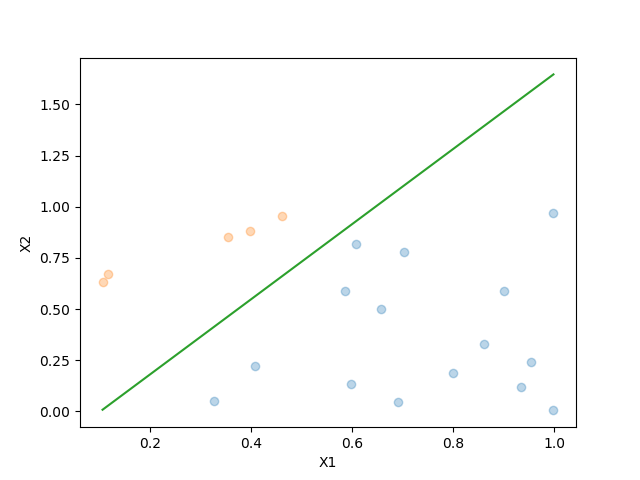

In [94]:
X, y = CriaDataSetClassificacao()

percep = Perceptron(PseudoInversa())
percep.fit(X,y)
ypred = percep.predict(X)

#comparando quantos são iguais e divide pelo tamanho: resultado é a acuracia
print(sum(ypred==y)/len(y))

plotDataSet(X, y)
plotHiperplano(X,y,percep.w[1:], percep.w[0])
plt.show()

### Perceptron - DescidaGradiente

0.95


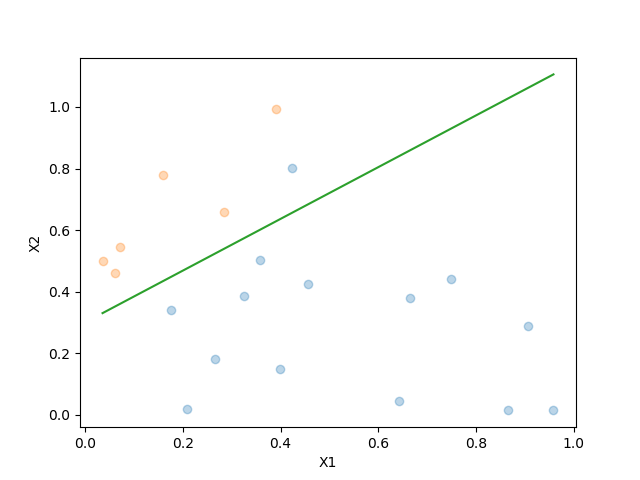

In [95]:
X, y = CriaDataSetClassificacao()

percep = Perceptron(DescidaGradiente())
percep.fit(X,y)
ypred = percep.predict(X)

#comparando quantos são iguais e divide pelo tamanho: resultado é a acuracia
print(sum(ypred==y)/len(y))

plotDataSet(X, y)
plotHiperplano(X,y,percep.w[1:], percep.w[0])
plt.show()

RESULTADOS

ambos algoritmos devem dar o mesmo resultado e os mesmos pesos.

# Com regularização

O parâmetro de "regularization" funciona como uma taxa de esquecimento no algoritmo de aprendizado. Quanto maior a regularização, mais esquecimento do w anterior eu tenho na nova iteração.
        
O objetivo é evitar overfitting.

In [123]:
X, y = CriaDataSetRegularizacao()

percep = Perceptron(PseudoInversa(regularization=1)) #testar com 0, 0.5, 1...
percep.fit(X,y)
ypred = percep.predict(X)

print(sum(ypred==y)/len(y))
#plotDataSet(X, y)
#plotHiperplano(X,y,percep.w[1:], percep.w[0])
#plt.show()


f1 [[20.          6.61585586 10.01004896 10.08304954]
 [ 6.61585586  3.34697409  3.40665016  3.53262291]
 [10.01004896  3.40665016  6.50003123  5.48157677]
 [10.08304954  3.53262291  5.48157677  6.8706609 ]]
f2 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[0.85 0.8  0.8  1.   0.7  0.85 0.85 0.75 0.8  0.85 0.8  0.95 0.8  0.8
 0.85 0.8  0.9  0.8  1.   0.95]
